In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from os import listdir
from os.path import isfile, join

files = [f for f in listdir("data/") if isfile(join("data/", f))]

files_features = [x for x in files if "_features" in x]
files_rawdata = [x for x in files if "_rawdata" in x]

In [7]:
files_features

['C4_10_features.xlsx',
 'C4_1_features.xlsx',
 'C4_5_features.xlsx',
 'C4_6_features.xlsx',
 'C4_8_features.xlsx']

In [8]:
files_rawdata

['C4_10_rawdata.xlsx',
 'C4_1_rawdata.xlsx',
 'C4_5_rawdata.xlsx',
 'C4_6_rawdata.xlsx',
 'C4_8_rawdata.xlsx']

In [48]:
dfs_features = {f.replace("_features.xlsx", "") : pd.read_excel(f"data/{f}") for f in files_features}
dfs_rawdata = {f.replace("_rawdata.xlsx", "") : pd.read_excel(f"data/{f}") for f in files_rawdata}

In [49]:
dfs_features.keys()

dict_keys(['C4_10', 'C4_1', 'C4_5', 'C4_6', 'C4_8'])

In [50]:
dfs_rawdata.keys()

dict_keys(['C4_10', 'C4_1', 'C4_5', 'C4_6', 'C4_8'])

In [51]:
def str_list_to_list(x):
    
    return ast.literal_eval(", ".join(x.split()).replace("[, ", "["))

In [52]:
dfs_rawdata["C4_10"]["Series time"] = dfs_rawdata["C4_10"]["Series time"].apply(str_list_to_list)

assert(dfs_rawdata["C4_10"]["Series time"].apply(lambda x: len(x)).nunique() == 1)

In [58]:
pd.concat([pd.DataFrame(dfs_rawdata["C4_10"]["Series time"].tolist(), 
                        columns=[f"x{i+1}" for i in range(100)]),
           dfs_rawdata["C4_10"]["Class"]], axis=1)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x92,x93,x94,x95,x96,x97,x98,x99,x100,Class
0,13.574633,0.488296,7.812738,20.996735,18.359935,4.492325,-0.878933,6.152532,12.695700,12.598041,...,-18.750572,3.320414,24.903104,29.004791,21.778008,10.449538,0.195318,2.148503,18.555254,0
1,27.832881,13.769951,-5.957213,-6.933805,1.269570,-6.250191,-23.242897,-23.145238,-5.957213,4.199347,...,-45.899838,-4.297006,58.986175,70.021668,12.109745,-41.895810,-38.184759,-15.723136,-26.172674,0
2,-44.630268,-23.340556,16.406751,21.778008,1.855525,5.078280,25.098422,11.133152,-35.840938,-56.642354,...,25.391400,16.211432,-16.992706,-39.356670,-34.473708,-16.895047,-3.711051,3.027436,6.152532,0
3,4.980621,2.246162,2.148503,1.757866,-2.929777,-6.152532,-3.711051,-7.910398,-27.832881,-42.286447,...,-29.200110,-16.895047,-4.785302,-12.988678,-23.438215,-16.211432,-6.836146,-14.551225,-25.977355,0
4,-21.192053,-10.840175,-12.695700,-16.992706,-8.203375,0.781274,-6.640828,-14.648885,-0.976592,18.359935,...,32.227546,12.012085,-12.500381,-5.664235,23.340556,34.766686,14.160588,-11.035493,-14.258248,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6139,-2.636799,-2.929777,-2.050844,-1.269570,-2.343822,-4.492325,-5.273598,-4.785302,-5.078280,-6.738487,...,-7.519761,-3.613392,1.171911,4.882962,5.371258,1.660207,-4.589984,-9.472945,-11.035493,1
6140,-10.742515,-11.523789,-14.551225,-18.457595,-21.875668,-24.121830,-25.098422,-24.610126,-23.828852,-23.828852,...,-9.668264,-8.203375,-8.105716,-7.617420,-7.715079,-10.156560,-13.574633,-14.844203,-13.379315,1
6141,-11.523789,-11.621448,-13.867611,-16.504410,-17.090365,-15.430158,-13.965270,-15.625477,-18.164617,-16.504410,...,-19.238868,-27.149266,-32.715842,-33.301798,-29.590747,-25.684378,-24.414808,-25.293741,-25.684378,1
6142,-24.512467,-22.754601,-20.606098,-17.676321,-14.160588,-12.012085,-12.305063,-13.672292,-13.769951,-12.891018,...,10.156560,11.328471,11.035493,9.277627,7.519761,7.324442,8.301035,8.594012,7.226783,1


### It works! Let's do this in general:

In [64]:
dfs_rawdata = {f.replace("_rawdata.xlsx", "") : pd.read_excel(f"data/{f}") for f in files_rawdata}

In [65]:
dfs_rawdata_open = {}

for k, df in dfs_rawdata.items():
    
    df["Series time"] = df["Series time"].apply(str_list_to_list)

    assert(df["Series time"].apply(lambda x: len(x)).nunique() == 1)
    
    n = df["Series time"].apply(lambda x: len(x)).unique()[0]
    
    df_open = pd.concat([pd.DataFrame(df["Series time"].tolist(), columns=[f"x{i+1}" for i in range(n)]),
                         df["Class"]], axis=1)
    
    dfs_rawdata_open[k] = df_open

In [67]:
dfs_rawdata_open.keys()

dict_keys(['C4_10', 'C4_1', 'C4_5', 'C4_6', 'C4_8'])

### Checks

In [70]:
dfs_rawdata_open['C4_10'].head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x92,x93,x94,x95,x96,x97,x98,x99,x100,Class
0,13.574633,0.488296,7.812738,20.996735,18.359935,4.492325,-0.878933,6.152532,12.695700,12.598041,...,-18.750572,3.320414,24.903104,29.004791,21.778008,10.449538,0.195318,2.148503,18.555254,0
1,27.832881,13.769951,-5.957213,-6.933805,1.269570,-6.250191,-23.242897,-23.145238,-5.957213,4.199347,...,-45.899838,-4.297006,58.986175,70.021668,12.109745,-41.895810,-38.184759,-15.723136,-26.172674,0
2,-44.630268,-23.340556,16.406751,21.778008,1.855525,5.078280,25.098422,11.133152,-35.840938,-56.642354,...,25.391400,16.211432,-16.992706,-39.356670,-34.473708,-16.895047,-3.711051,3.027436,6.152532,0
3,4.980621,2.246162,2.148503,1.757866,-2.929777,-6.152532,-3.711051,-7.910398,-27.832881,-42.286447,...,-29.200110,-16.895047,-4.785302,-12.988678,-23.438215,-16.211432,-6.836146,-14.551225,-25.977355,0
4,-21.192053,-10.840175,-12.695700,-16.992706,-8.203375,0.781274,-6.640828,-14.648885,-0.976592,18.359935,...,32.227546,12.012085,-12.500381,-5.664235,23.340556,34.766686,14.160588,-11.035493,-14.258248,0


In [71]:
dfs_rawdata['C4_10'].head()

,Series time,Class
0,"[13.57463301, 0.48829615, 7.81273843, 20.99673...",0
1,"[27.83288064, 13.76995148, -5.95721305, -6.933...",0
2,"[-44.63026826, -23.34055605, 16.40675069, 21.7...",0
3,"[4.98062075, 2.2461623, 2.14850307, 1.75786615...",0
4,"[-21.19205298, -10.84017457, -12.69569994, -16...",0


In [75]:
dfs_rawdata_open['C4_8'].head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x92,x93,x94,x95,x96,x97,x98,x99,x100,Class
0,-8.691671,-5.664235,-6.640828,-11.133152,-16.309091,-16.602069,-9.082308,-1.074252,-2.343822,-10.840175,...,2.246162,1.171911,-5.175939,-22.266305,-37.794122,-36.622211,-23.145238,-11.523789,-3.613392,0
1,5.859554,9.277627,-3.613392,-21.680349,-23.340556,-9.277627,-2.636799,-12.695700,-22.559282,-18.555254,...,-12.793359,-8.789331,-8.789331,-20.703757,-34.571368,-32.911161,-18.164617,-10.644856,-17.969298,0
2,-26.563311,-24.805445,-18.164617,-12.891018,-6.054872,2.636799,0.976592,-17.188025,-38.575396,-45.606861,...,-31.836909,-24.610126,-18.555254,-20.508438,-33.594775,-46.974090,-46.095157,-32.325205,-20.801416,0
3,-19.434187,-21.680349,-21.680349,-22.852260,-27.149266,-28.516495,-25.391400,-26.075015,-34.083071,-40.137944,...,-8.301035,-27.149266,-41.798151,-39.161351,-27.637562,-23.731193,-30.957976,-37.012848,-30.664998,0
4,-13.965270,-0.878933,-2.441481,-15.820795,-26.856288,-27.051607,-23.047578,-26.075015,-34.083071,-35.254982,...,-23.242897,-20.117801,-15.723136,-12.695700,-9.961241,-11.523789,-24.121830,-40.430921,-40.723899,0


In [73]:
dfs_rawdata['C4_8'].head()

,Series time,Class
0,"[-8.6916715, -5.66423536, -6.64082766, -11.133...",0
1,"[5.85955382, 9.27762688, -3.61339152, -21.6803...",0
2,"[-26.56331065, -24.8054445, -18.16461684, -12....",0
3,"[-19.43418683, -21.68034913, -21.68034913, -22...",0
4,"[-13.96526994, -0.87893307, -2.44148076, -15.8...",0


### It's all perfect!

In [78]:
for k, df in dfs_rawdata_open.items():
    
    df.to_csv(f"data/{k}_rawdata_open.csv", index=False)
    df.to_parquet(f"data/{k}_rawdata_open.parquet", index=False)

In [82]:
files = [f for f in listdir("data/") if isfile(join("data/", f))]

files_rawdata_open_csv = [x for x in files if "_rawdata_open.csv" in x]
files_rawdata_open_parquet = [x for x in files if "_rawdata_open.parquet" in x]

['C4_10_rawdata_open.parquet',
 'C4_1_rawdata_open.parquet',
 'C4_5_rawdata_open.parquet',
 'C4_6_rawdata_open.parquet',
 'C4_8_rawdata_open.parquet']

In [83]:
dfs_rawdata_open_read_csv = {f.replace("_rawdata_open.csv", "") : pd.read_csv(f"data/{f}") for f in files_rawdata_open_csv}

In [85]:
dfs_rawdata_open_read_csv.keys()

dict_keys(['C4_10', 'C4_1', 'C4_5', 'C4_6', 'C4_8'])

In [87]:
dfs_rawdata_open_read_csv["C4_10"]

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x92,x93,x94,x95,x96,x97,x98,x99,x100,Class
0,13.574633,0.488296,7.812738,20.996735,18.359935,4.492325,-0.878933,6.152532,12.695700,12.598041,...,-18.750572,3.320414,24.903104,29.004791,21.778008,10.449538,0.195318,2.148503,18.555254,0
1,27.832881,13.769951,-5.957213,-6.933805,1.269570,-6.250191,-23.242897,-23.145238,-5.957213,4.199347,...,-45.899838,-4.297006,58.986175,70.021668,12.109745,-41.895810,-38.184759,-15.723136,-26.172674,0
2,-44.630268,-23.340556,16.406751,21.778008,1.855525,5.078280,25.098422,11.133152,-35.840938,-56.642354,...,25.391400,16.211432,-16.992706,-39.356670,-34.473708,-16.895047,-3.711051,3.027436,6.152532,0
3,4.980621,2.246162,2.148503,1.757866,-2.929777,-6.152532,-3.711051,-7.910398,-27.832881,-42.286447,...,-29.200110,-16.895047,-4.785302,-12.988678,-23.438215,-16.211432,-6.836146,-14.551225,-25.977355,0
4,-21.192053,-10.840175,-12.695700,-16.992706,-8.203375,0.781274,-6.640828,-14.648885,-0.976592,18.359935,...,32.227546,12.012085,-12.500381,-5.664235,23.340556,34.766686,14.160588,-11.035493,-14.258248,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6139,-2.636799,-2.929777,-2.050844,-1.269570,-2.343822,-4.492325,-5.273598,-4.785302,-5.078280,-6.738487,...,-7.519761,-3.613392,1.171911,4.882962,5.371258,1.660207,-4.589984,-9.472945,-11.035493,1
6140,-10.742515,-11.523789,-14.551225,-18.457595,-21.875668,-24.121830,-25.098422,-24.610126,-23.828852,-23.828852,...,-9.668264,-8.203375,-8.105716,-7.617420,-7.715079,-10.156560,-13.574633,-14.844203,-13.379315,1
6141,-11.523789,-11.621448,-13.867611,-16.504410,-17.090365,-15.430158,-13.965270,-15.625477,-18.164617,-16.504410,...,-19.238868,-27.149266,-32.715842,-33.301798,-29.590747,-25.684378,-24.414808,-25.293741,-25.684378,1
6142,-24.512467,-22.754601,-20.606098,-17.676321,-14.160588,-12.012085,-12.305063,-13.672292,-13.769951,-12.891018,...,10.156560,11.328471,11.035493,9.277627,7.519761,7.324442,8.301035,8.594012,7.226783,1


In [84]:
dfs_rawdata_open_read_parquet = {f.replace("_rawdata_open.parquet", "") : pd.read_parquet(f"data/{f}") for f in files_rawdata_open_parquet}

In [86]:
dfs_rawdata_open_read_parquet.keys()

dict_keys(['C4_10', 'C4_1', 'C4_5', 'C4_6', 'C4_8'])

In [88]:
dfs_rawdata_open_read_parquet["C4_10"]

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x92,x93,x94,x95,x96,x97,x98,x99,x100,Class
0,13.574633,0.488296,7.812738,20.996735,18.359935,4.492325,-0.878933,6.152532,12.695700,12.598041,...,-18.750572,3.320414,24.903104,29.004791,21.778008,10.449538,0.195318,2.148503,18.555254,0
1,27.832881,13.769951,-5.957213,-6.933805,1.269570,-6.250191,-23.242897,-23.145238,-5.957213,4.199347,...,-45.899838,-4.297006,58.986175,70.021668,12.109745,-41.895810,-38.184759,-15.723136,-26.172674,0
2,-44.630268,-23.340556,16.406751,21.778008,1.855525,5.078280,25.098422,11.133152,-35.840938,-56.642354,...,25.391400,16.211432,-16.992706,-39.356670,-34.473708,-16.895047,-3.711051,3.027436,6.152532,0
3,4.980621,2.246162,2.148503,1.757866,-2.929777,-6.152532,-3.711051,-7.910398,-27.832881,-42.286447,...,-29.200110,-16.895047,-4.785302,-12.988678,-23.438215,-16.211432,-6.836146,-14.551225,-25.977355,0
4,-21.192053,-10.840175,-12.695700,-16.992706,-8.203375,0.781274,-6.640828,-14.648885,-0.976592,18.359935,...,32.227546,12.012085,-12.500381,-5.664235,23.340556,34.766686,14.160588,-11.035493,-14.258248,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6139,-2.636799,-2.929777,-2.050844,-1.269570,-2.343822,-4.492325,-5.273598,-4.785302,-5.078280,-6.738487,...,-7.519761,-3.613392,1.171911,4.882962,5.371258,1.660207,-4.589984,-9.472945,-11.035493,1
6140,-10.742515,-11.523789,-14.551225,-18.457595,-21.875668,-24.121830,-25.098422,-24.610126,-23.828852,-23.828852,...,-9.668264,-8.203375,-8.105716,-7.617420,-7.715079,-10.156560,-13.574633,-14.844203,-13.379315,1
6141,-11.523789,-11.621448,-13.867611,-16.504410,-17.090365,-15.430158,-13.965270,-15.625477,-18.164617,-16.504410,...,-19.238868,-27.149266,-32.715842,-33.301798,-29.590747,-25.684378,-24.414808,-25.293741,-25.684378,1
6142,-24.512467,-22.754601,-20.606098,-17.676321,-14.160588,-12.012085,-12.305063,-13.672292,-13.769951,-12.891018,...,10.156560,11.328471,11.035493,9.277627,7.519761,7.324442,8.301035,8.594012,7.226783,1


In [128]:
def plot_time_series(df_dict, key, medida, same_graph=False):

    classe = df_dict[key].loc[medida, "Class"]
    series = df_dict[key].drop(columns="Class").loc[medida]

    series.index = range(len(series))

    if not same_graph:
        plt.figure(figsize=(12, 6))
        plt.title(f"Série temporal - participante {key} - medida {medida} - classe {classe}")
    
    plt.plot(series, label=f"medida {i}")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    if not same_graph:
        plt.show()

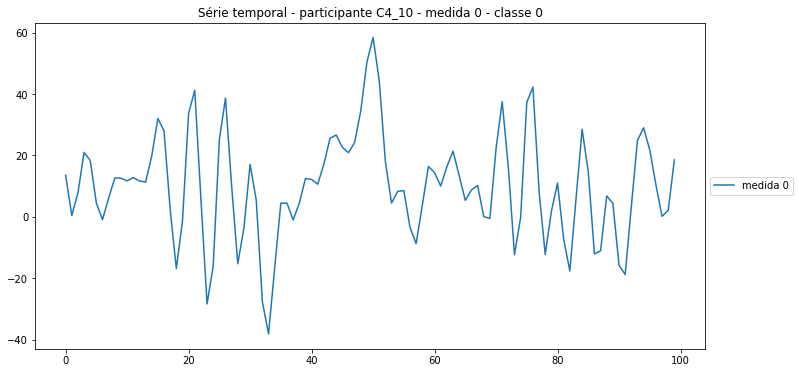

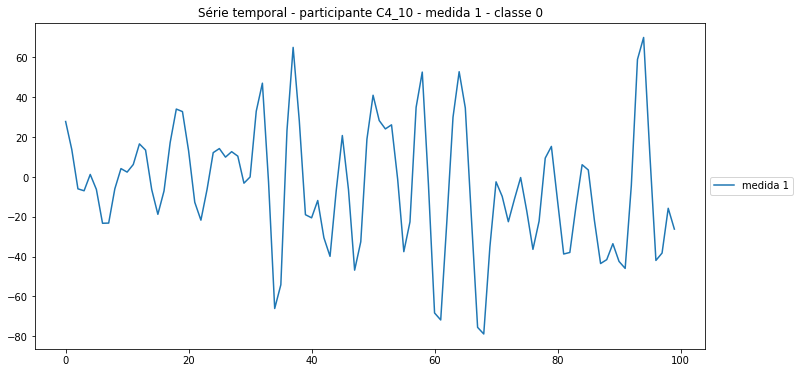

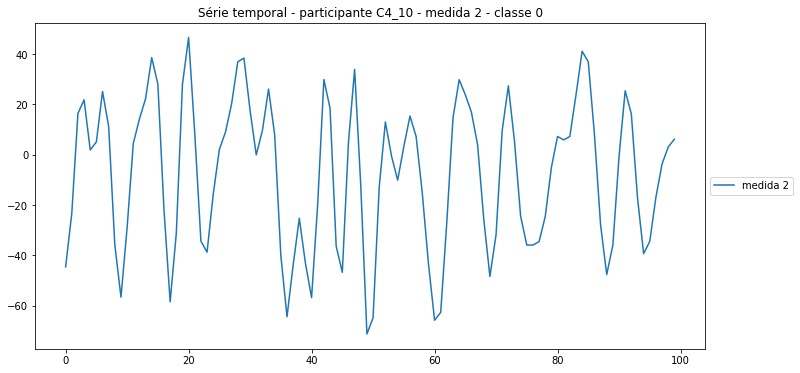

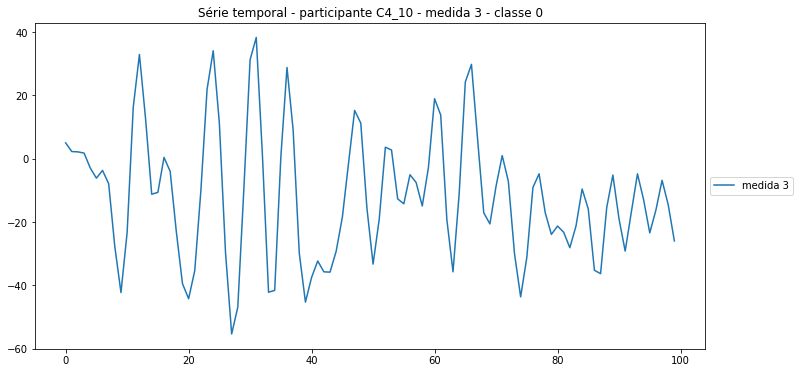

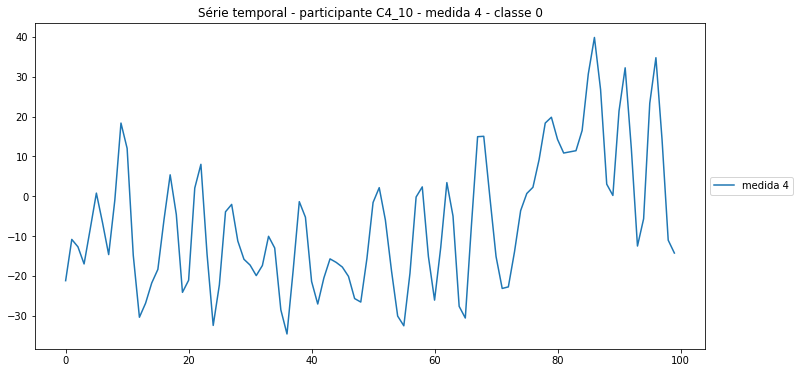

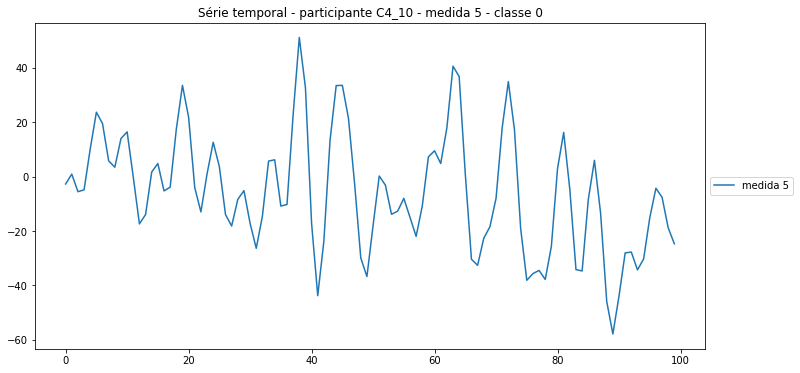

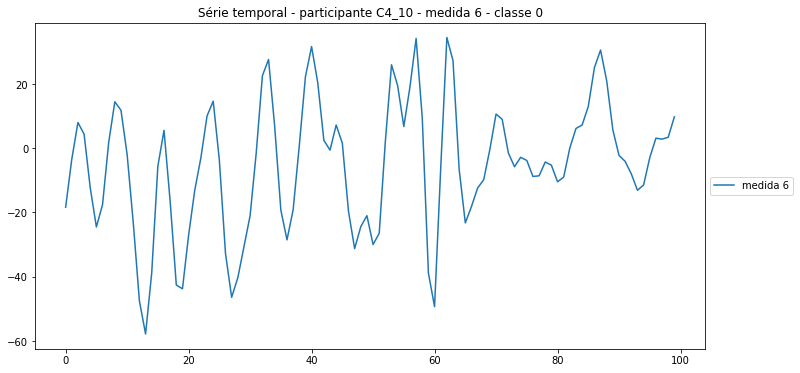

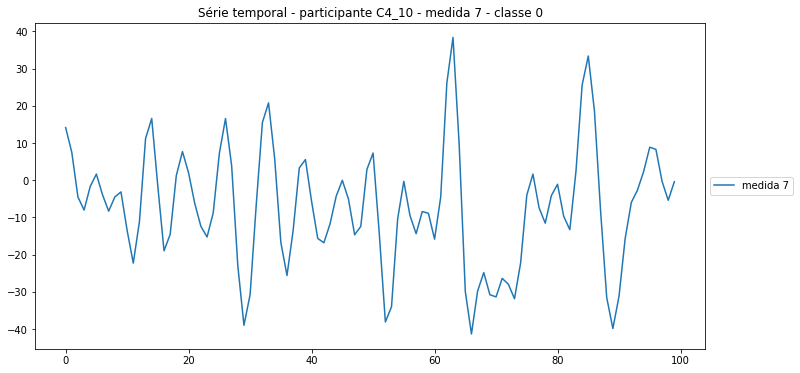

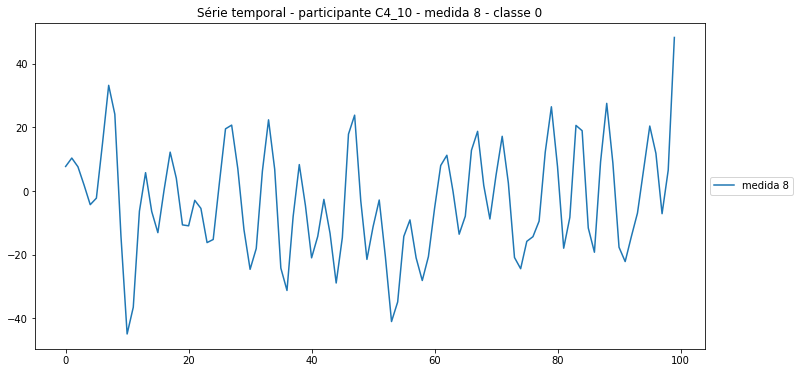

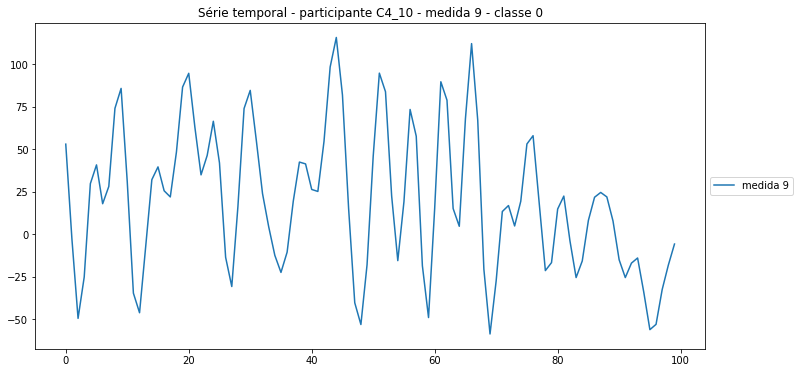

In [129]:
for i in range(10):

    plot_time_series(dfs_rawdata_open_read_parquet, "C4_10", i)

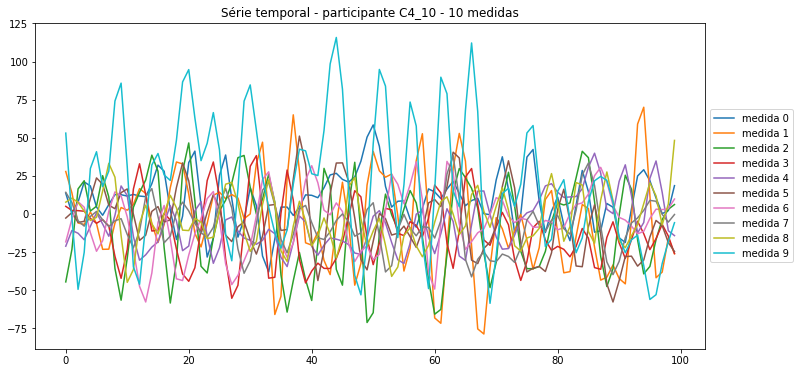

In [130]:
plt.figure(figsize=(12, 6))
plt.title(f"Série temporal - participante C4_10 - 10 medidas")

for i in range(10):

    plot_time_series(dfs_rawdata_open_read_parquet, "C4_10", i, same_graph=True)
    
plt.show()